**Problem Set 5: Trees, Forests, and Networks**


# Part 1: Exploring The Titanic

Your mission for this problem set is to use your knowledge of supervised machine learning to try to predict which passengers aboard the Titanic were most likely to survive. The prompts for this part of the problem set are deliberately vague - the goal is to leave it up to you how to structure (most of) your analysis. We **highly recommend** you closely go over the entire problem set once before starting; this is important, so that you understand the sequence of steps and not perform redundant work.

To get started, read about the prediction problem on [Kaggle](https://www.kaggle.com/c/titanic). Then, download the data [here](https://www.kaggle.com/c/titanic/data) - you'll need the `train.csv` data. Treat this as your entire dataset, and further build train and test splits from this dataset whenever required. 

## 1.1 Exploratory data analysis

Create 2-3 figures and tables that help give you a feel for the data. Make sure to at least check the data type of each variable, to understand which variables have missing observations, and to understand the distribution of each variable (and determine whether the variables should be standardized or not). Are any of the potential predictor variables (i.e., anything execpt for survival) collinear or highly correlated? Remember that this is the EDA phase, and we want to save pre-processing steps like imputations, transformations etc. and feature engineering for later.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, r2_score
from sklearn.model_selection import cross_validate

In [2]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

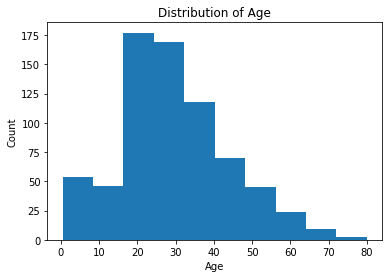

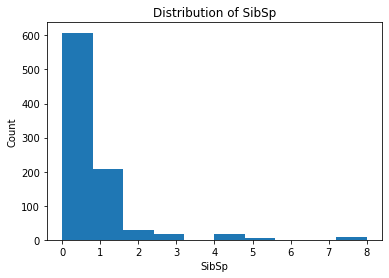

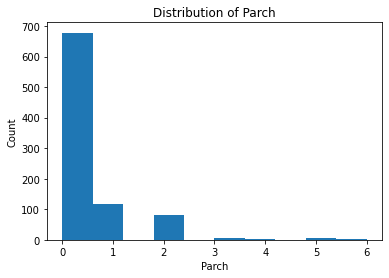

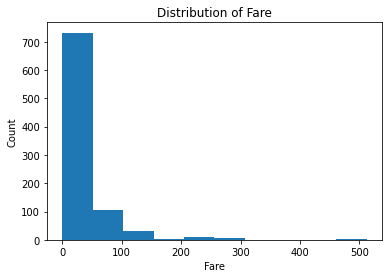

In [6]:
def numerical_hist_plot(var):
    plt.hist(data[var])
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title('Distribution of {}'.format(var))
    plt.show()
    
numerical_var = ['Age','SibSp','Parch','Fare']
for var in numerical_var:
    numerical_hist_plot(var)

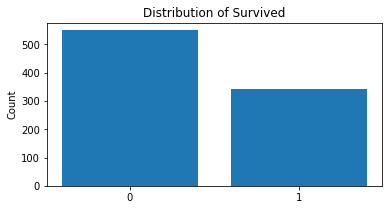

Survived: 
0    549
1    342
Name: Survived, dtype: int64


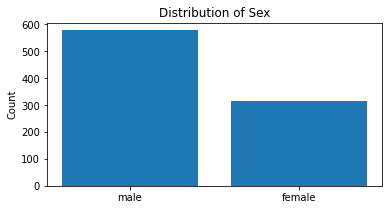

Sex: 
male      577
female    314
Name: Sex, dtype: int64


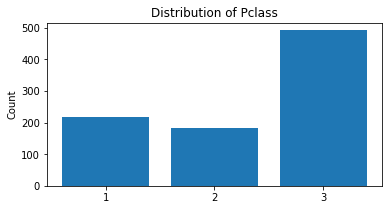

Pclass: 
3    491
1    216
2    184
Name: Pclass, dtype: int64


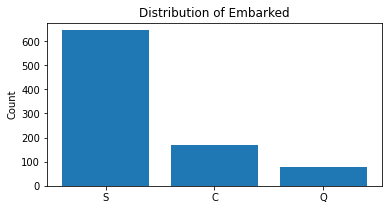

Embarked: 
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [7]:
def categorical_bar_plot(variable):
    var = data[variable]
    var_value = var.value_counts()
    
    plt.figure(figsize = (6,3))
    plt.bar(var_value.index, var_value)
    plt.xticks(var_value.index, var_value.index.values)
    plt.ylabel('Count')
    plt.title('Distribution of {}'.format(variable))
    plt.show()
    print('{}: \n{}'.format(variable, var_value))
    
categorical_var = ['Survived','Sex','Pclass','Embarked']
for var in categorical_var:
    categorical_bar_plot(var)

Text(0.5, 1.0, 'Correlation Matrix')

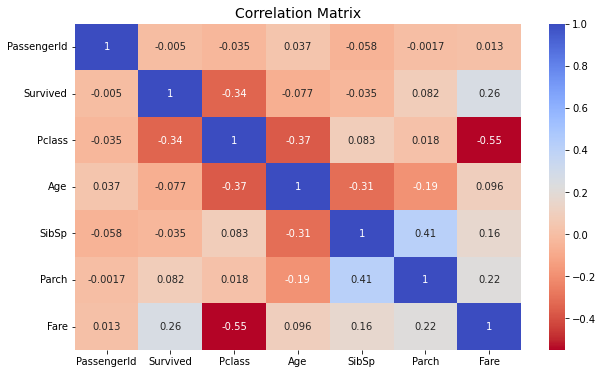

In [8]:
f, ax = plt.subplots(1,1, figsize = (10,6))

corr = data.corr()
sns.heatmap(corr, cmap = 'coolwarm_r', annot = True, annot_kws = {'size':10}, ax=ax)
ax.set_title('Correlation Matrix', fontsize = 14)

**data type of each variable**  

int64: PassengerId, Survived, Pclass, SibSp, Parch

float64: Age, Fare

object: Name, Sex, Ticket, Cabin, Embarked  

**missing observation**  

Cabin(687, 77.10%), Age(177, 19.87%), Embarked(2, 0.22%). 

**Distribution of each variable**  

The distribution of some of the variables are shown above by the bar/hist plot.  

From my perspective, I think the 'Age' and 'Fare' variable should be standardized.  

**Collinearity**  
  
The correlation matrix is shown above and we can see that the 'Fare' and 'Pclass' is highly related, and 'Parch'-'SibSp', 'Age'-'Pclass', 'Age'-'SibSp', 'Age'-'Survived' are also quite correlated.

## 1.2 Correlates of survival

Use whatever methods you can think of to try and figure out what factors seem to determine whether or not a person would survive the sinking of the Titanic. You can start with simple correlations, but will likely also want to use multiple regression and/or other methods in your toolkit. What do you conclude?

In [9]:
# Pclass vc Survived
data[['Pclass','Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


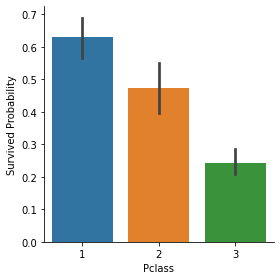

In [10]:
g = sns.catplot(x = "Pclass", y = "Survived", data = data, kind = "bar", height = 4)
g.set_ylabels("Survived Probability")
plt.show()

In [11]:
# Sex vs Survived
data[['Sex','Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


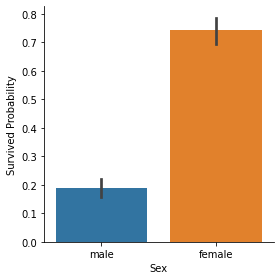

In [12]:
g = sns.catplot(x = "Sex", y = "Survived", data = data, kind = "bar", height = 4)
g.set_ylabels("Survived Probability")
plt.show()

In [13]:
# Sibsp vs Survived
data[['SibSp','Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


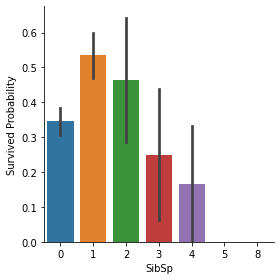

In [14]:
g = sns.catplot(x = "SibSp", y = "Survived", data = data, kind = "bar", height = 4)
g.set_ylabels("Survived Probability")
plt.show()

In [15]:
# Parch vs Survived
data[['Parch','Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


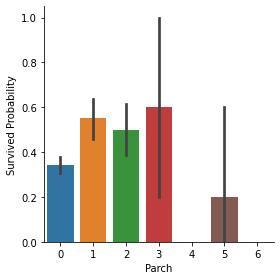

In [16]:
g = sns.catplot(x = "Parch", y = "Survived", data = data, kind = "bar", height = 4)
g.set_ylabels("Survived Probability")
plt.show()

From the correlation matrix above, we can tell that there are some variables that have a quite high effect on the survive probabilty, including the Pclass, Age, Fare, sex, SibSp and Parch.

## 1.3 Preprocessing steps
Take whatever pre-processing steps you believe are necessary for each variable in the dataset (for example, these might include normalization, standardization, log transforms, dummy-encoding, or dropping a variable altogether). For now, you can ignore null values in the dataset --- we'll come back to those later. Create a table describing the preprocessing step for each variable. Make sure the variables are alphabetized and your table is well-organized.

In [17]:
variable_name = list(data.columns.sort_values())
handle_step = ['Normalization',
               'Drop',
               'Get dummy variable',
               'Normalization',
               'Change name into common title, and then get dummy variable',
               'Together with SibSp to create new variable called family size',
               'Drop',
               'Do nothing',
               'Change categorical variable to numerical',
               'Together with Parch to create new variable called family size',
               'Do nothing',
               'Drop']
preprocessing_table = pd.DataFrame({'Variable name': variable_name,
                                    'Preprocessing':handle_step})
preprocessing_table = preprocessing_table.style.set_properties(**{'text-align': 'left'})
preprocessing_table = preprocessing_table.set_table_styles([dict(selector = 'th', props=[('text-align', 'left')])])
preprocessing_table

,Variable name,Preprocessing
0,Age,Normalization
1,Cabin,Drop
2,Embarked,Get dummy variable
3,Fare,Normalization
4,Name,"Change name into common title, and then get dummy variable"
5,Parch,Together with SibSp to create new variable called family size
6,PassengerId,Drop
7,Pclass,Do nothing
8,Sex,Change categorical variable to numerical
9,SibSp,Together with Parch to create new variable called family size


# Part 2: Decision Trees
## 2.1 Decision Tree
Using the basic [Decision Tree Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)  in sklearn, fit a model to predict titanic survival, using 10-fold cross-validation. For this and the following problems, you should set aside some (20%) of your training data as held-out test data, prior to cross-validation. 

Begin by using the default hyperparameters, and report the average training and cross-validated accuracy across the 10 folds.  Then, fit a single decision tree model on all of the training data (i.e., no cross-validation in this particular step), and report the performance of this fitted model on the held-out test data -- how does it compare to the cross-validated accuracy? Finally, show a diagram of this tree (at least the first three levels of splits), and provide a couple sentences interpreting the tree diagram.

NOTE - You may drop columns with null values for now; we'll come back to those columns later in the problem set.

In [18]:
# At this time, we don't do a lot of feature engineering, we just change some of the features to make the models run

# Drop passengerId, Ticket, Cabin, Name for now
data_raw = data.drop(['Name','PassengerId','Ticket','Cabin'], axis = 1)
data_raw = data_raw.dropna(axis=0)

# Embarked
data_raw['Embarked'] = data_raw['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

# Sex. Change from categorical data to numerical values
data_raw['Sex'] = data_raw['Sex'].map({'female':1, 'male':0}).astype(int)

# For now, we just change the dtype of the feature in order to run the model. 
# This doesn't represent the final feature engineering.

In [19]:
data_raw.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [26]:
data_raw.shape

(712, 8)

In [20]:
X = data_raw.drop(['Survived'],axis = 1)
y = data_raw['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print('The shape of X_train is {}'.format(X_train.shape))
print('The shape of X_test is {}'.format(X_test.shape))
print('The shape of y_train is {}'.format(y_train.shape))
print('The shape of y_test is {}'.format(y_test.shape))

The shape of X_train is (569, 7)
The shape of X_test is (143, 7)
The shape of y_train is (569,)
The shape of y_test is (143,)


In [21]:
model1 = DecisionTreeClassifier()
cross_validation_result = cross_validate(model1, X_train, y_train, cv = 10, return_train_score = True, return_estimator = True)
avg_training_acc_dtc = np.mean(cross_validation_result['train_score'])
avg_cross_validated_dtc = np.mean(cross_validation_result['test_score'])
print('The average training accuracy across the 10 folds is {:.3f}'.format(avg_training_acc_dtc))
print('The average cross-validated accuracy across the 10 folds is {:.3f}'.format(avg_cross_validated_dtc))

The average training accuracy across the 10 folds is 0.989
The average cross-validated accuracy across the 10 folds is 0.754


In [22]:
# A single decision tree
model2 = DecisionTreeClassifier()
model2.fit(X_train,y_train)
y_pred_singledtc = model2.predict(X_test)
acc_singledtc = accuracy_score(y_test,y_pred_singledtc)
print('The performace of this fitted model is {:.3f}'.format(acc_singledtc))

The performace of this fitted model is 0.706


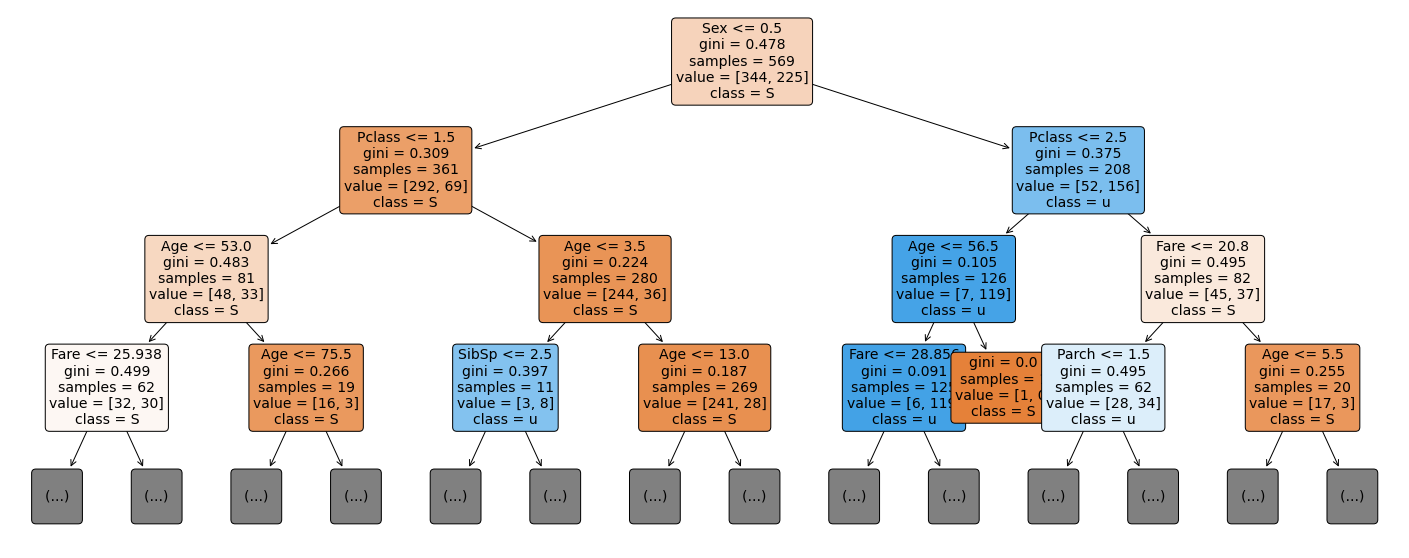

In [23]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,10))
a = plot_tree(model2, 
              feature_names=X_train.columns, 
              class_names="Survived", 
              max_depth=3,
              filled=True, 
              rounded=True, 
              fontsize=14)

By using the default hyperparameters, the average training accuracy across the 10 folds is 0.989. The average cross-validated accuracy across the 10 folds is 0.756.   

The performance of a single decision tree on the test set is 0.720, which is a little bit smaller than that of the average cross-validated accuracy, however, which is calculated on the validation set, not the test set.    

A diagram of this tree is shown above with at least the first three levels of splits. The interpretation of this tree diagram is that at the very first beginning, this tree is splitted based on the 'Sex' feature and the gini impurity coefficient is 0.478. It seems that it uses sex to split the tree to get the most information gain. Then the tree is splitted on the Pclass, which is considered as the second most important feature to split the tree. The gini impurity definitely gets smaller compared to the top node. The third split seems to be based on the age and fare feature. As a diagram, we can also tell how many survived people are in each part. The feature importances with descending are sex, Pclass, Age and Fare.


## 2.2 Hyperparameter: Maximum Depth

Use all of the data (minus the held-out data) to re-fit a single decision tree with `max_depth = 4` (i.e., no cross-validation). Show the tree diagram and also plot the feature importance. What do you observe? How does the performance of this tree compare to the tree from 2.1?

In [24]:
# Decision tree with the max depth of 4
model3 = DecisionTreeClassifier(max_depth = 4)
model3.fit(X_train, y_train)

train_pred_dtc = model3.predict(X_train)
test_pred_dtc = model3.predict(X_test)

train_acc_dtc = accuracy_score(y_train, train_pred_dtc)
test_acc_dtc = accuracy_score(y_test, test_pred_dtc)

print('The accuracy of a decision tree of max_depth of 4 on the training set is {:.3f}'.format(train_acc_dtc))
print('The accuracy of a decision tree of max_depth of 4 on the test set is {:.3f}'.format(test_acc_dtc))

The accuracy of a decision tree of max_depth of 4 on the training set is 0.835
The accuracy of a decision tree of max_depth of 4 on the test set is 0.685


In [25]:
model = DecisionTreeClassifier(max_depth = 9, min_samples_leaf = 5)
model.fit(X_train, y_train)

train_pred_dtc = model.predict(X_train)
test_pred_dtc = model.predict(X_test)

train_acc_dtc = accuracy_score(y_train, train_pred_dtc)
test_acc_dtc = accuracy_score(y_test, test_pred_dtc)

print('The accuracy of a decision tree of max_depth of 4 on the training set is {:.3f}'.format(train_acc_dtc))
print('The accuracy of a decision tree of max_depth of 4 on the test set is {:.3f}'.format(test_acc_dtc))

The accuracy of a decision tree of max_depth of 4 on the training set is 0.873
The accuracy of a decision tree of max_depth of 4 on the test set is 0.776


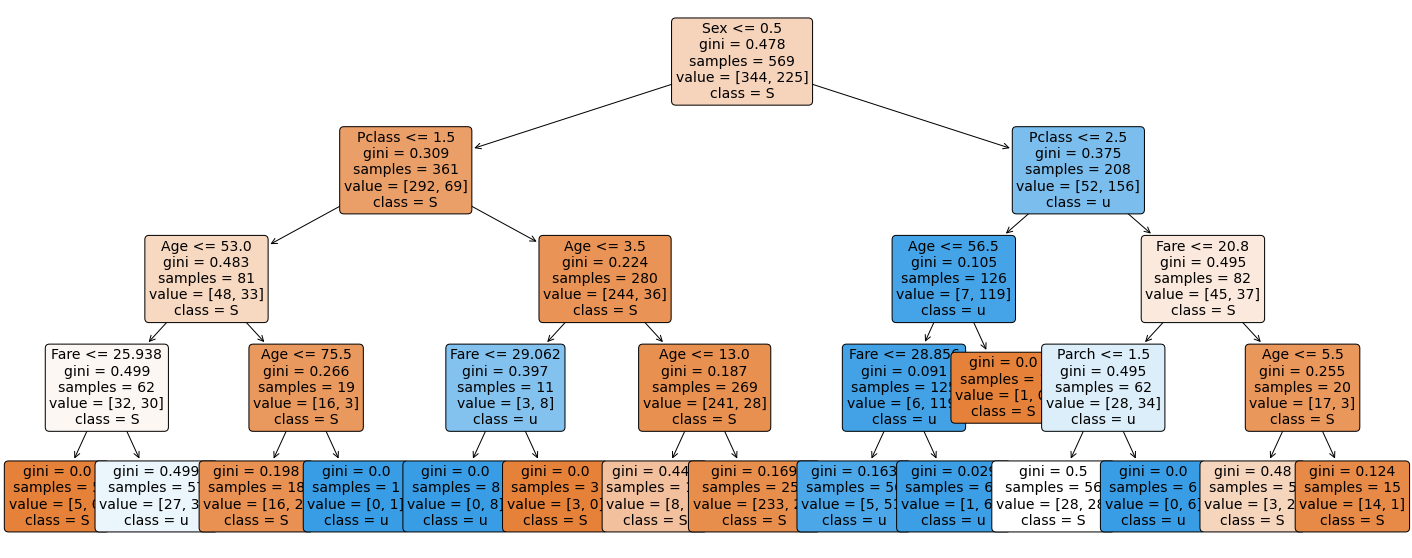

In [27]:
# Tree diagram
plt.figure(figsize=(25,10))
a = plot_tree(model3, 
              feature_names=X_train.columns, 
              class_names="Survived", 
              filled=True, 
              rounded=True, 
              fontsize=14)

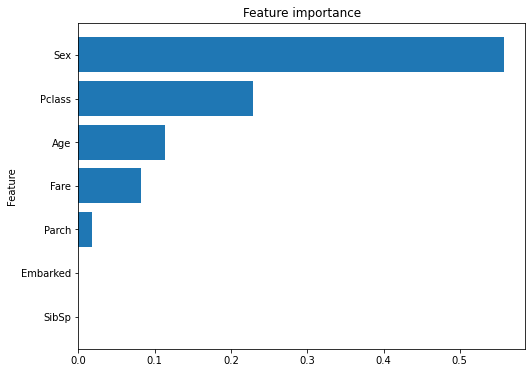

In [28]:
# Feature Importance
plt.figure(figsize = (8,6))
features_plot = X_train.columns
importances = model3.feature_importances_
idx = np.argsort(importances) # sort ascendingly, mark index
plt.title("Feature importance")
plt.barh(range(len(idx)), importances[idx])
plt.yticks(range(len(idx)), [features_plot[i] for i in idx])
plt.ylabel("Feature")
plt.show()

The accuracy of a decision tree of max_depth of 4 on the training set is 0.835  
The accuracy of a decision tree of max_depth of 4 on the test set is 0.685
  
The diagram of the tree in 2.2 is the same as the diagram of the tree in 2.1 in terms of the first three layers of the split. And as a result, the feature importances are also quite similar. The Sex, Pclass, Age and Fare plays a quite important roles in splitting the trees.  
  
Due to the regulation on the max depth of the tree, the performance of the tree in 2.2 shows a smaller decrease in terms of the accuracy compared to the single tree model in 2.1.

## 2.3  Tuning Hyperparameters
The built-in algorithm you are using has several parameters which you can tune. Using cross-validation, show how the choice of these parameters affects performance.

First, show how `max_depth` affects train and cross-validated accuracy. On a single axis, plot train and cross-validated accuracy as a function of `max_depth`. Use a red line to show cross-validated accuracy and a blue line to show train accuracy. Do not use your held-out test data yet.

Second, show how cross-validated accuracy relates to both `max_depth` and `min_samples_leaf`. Specifically, create a 3-D plot where the x-axis is `max_depth`, the y-axis is `min_samples_leaf`, and the z-axis shows cross-validated accuracy. What combination of `max_depth` and `min-samples_leaf` achieves the highest accuracy? How sensitive are the results to these two parameters?

Finally, select the the best hyperparameters that you got through cross-validation, and fit a single decision tree on all of the training data using those hyperparameters. Display this tree and report the accuracy of this tree on the held-out data.

In [29]:
max_depths = list(range(1,10))
max_depth_cv_train_acc = []
max_depth_cv_valid_acc = []

for depth in max_depths:
    model = DecisionTreeClassifier(max_depth = depth)
    result = cross_validate(model, X_train, y_train, cv = 10, return_train_score = True)
    max_depth_cv_train_acc.append(np.mean(result['train_score']))
    max_depth_cv_valid_acc.append(np.mean(result['test_score']))
    
result = pd.DataFrame({'max_depth':max_depths,
                       'Train_acc':max_depth_cv_train_acc,
                       'Valid_acc':max_depth_cv_valid_acc})
result

,max_depth,Train_acc,Valid_acc
0,1,0.787345,0.787281
1,2,0.802576,0.801410
2,3,0.823861,0.785620
3,4,0.843197,0.773340
4,5,0.868584,0.803195
5,6,0.885571,0.785652
6,7,0.898461,0.776942
7,8,0.917791,0.780451
8,9,0.929703,0.771648


Text(0, 0.5, 'Accuracy')

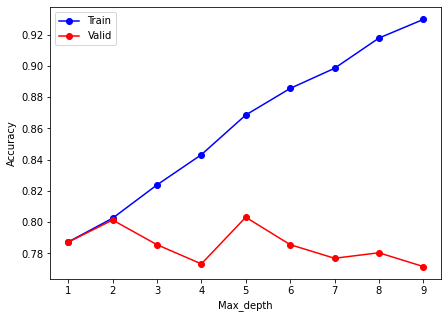

In [30]:
fig, ax = plt.subplots(figsize = (7,5))

ax.plot(result.max_depth, result.Train_acc, 'o-', c='blue', label = 'Train')
ax.plot(result.max_depth, result.Valid_acc, 'o-', c='red', label = 'Valid')

ax.legend()
ax.set_xlabel('Max_depth')
ax.set_ylabel('Accuracy')

In [31]:
max_depths = list(range(1,10))
min_samples_leafs = list(range(1,10))
cv_valid_acc = []
max_depth_list = []
min_samples_leaf_list = []

for depth in max_depths:
    for min_leaf in min_samples_leafs:
        model = DecisionTreeClassifier(max_depth = depth, min_samples_leaf = min_leaf)
        result = cross_validate(model, X_train, y_train, cv = 10)
        cv_valid_acc.append(np.mean(result['test_score']))
        max_depth_list.append(depth)
        min_samples_leaf_list.append(min_leaf)
        
result = pd.DataFrame({'max_depth':max_depth_list,
                       'min_samples_leaf':min_samples_leaf_list,
                       'Valid_acc':cv_valid_acc})
result

,max_depth,min_samples_leaf,Valid_acc
0,1,1,0.787281
1,1,2,0.787281
2,1,3,0.787281
3,1,4,0.787281
4,1,5,0.787281
...,...,...,...
76,9,5,0.787406
77,9,6,0.790852
78,9,7,0.792575
79,9,8,0.797964


In [32]:
max_valid_acc = result.Valid_acc.max()
max_valid_acc_idx = result[result.Valid_acc == max_valid_acc].index.values
result.loc[max_valid_acc_idx]

,max_depth,min_samples_leaf,Valid_acc
36,5,1,0.804981


Text(0.5, 0.92, 'Averaged cross-validated accuacy based on different combination of max_depth and min_samples_leaf')

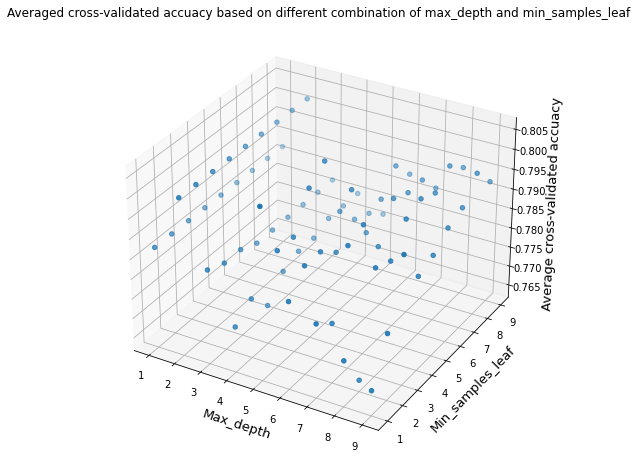

In [33]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(xs = result.max_depth, 
             ys = result.min_samples_leaf,
             zs = result.Valid_acc)
ax.set_xlabel('Max_depth',fontsize = 13)
ax.set_ylabel('Min_samples_leaf', fontsize = 13)
ax.set_zlabel('Average cross-validated accuacy', fontsize = 13)
ax.set_title('Averaged cross-validated accuacy based on different combination of max_depth and min_samples_leaf')

In [34]:
# Decision tree with the max depth of 5 and min samples leaf of 1
model4 = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 1)
model4.fit(X_train, y_train)

train_pred_dtc = model4.predict(X_train)
test_pred_dtc = model4.predict(X_test)

train_acc_dtc = accuracy_score(y_train, train_pred_dtc)
test_acc_dtc = accuracy_score(y_test, test_pred_dtc)

print('The accuracy of a decision tree of max_depth of 5 and min samples leaf of 1 on the training set is {:.3f}'.format(train_acc_dtc))  
print()
print('The accuracy of a decision tree of max_depth of 5 and min samples leaf of 1 on the test set is {:.3f}'.format(test_acc_dtc))

The accuracy of a decision tree of max_depth of 5 and min samples leaf of 1 on the training set is 0.865

The accuracy of a decision tree of max_depth of 5 and min samples leaf of 1 on the test set is 0.741


First, how max_depth affects train and cross-validated accuracy are shown above. It seems that with the increase in the max_depth, the accuracy on the training set is getting bigger, however, the accuracy of the validation set is keeping at a relative stable value around 0.78
  
Second, how cross-validated accuracy relates to both max_depth and min_samples_leaf are shown in the 3D scatter plot above. When the max_depth equals 5 and min_samples_leaf equals 1, this combination gets the highest accuracy. In terms of the sensitivity of the two hyperparameter, I would say that they are not that sensitive as a fact of the when the max_depth is fixed, the accuracy does not change when the min_samples_leaf changes.  
  
Finally, the single tree with the best hyperparameter I got from above gets an accuracy score of 0.865 on the training set and 0.741 on the test set, both of which are higher than that from 2.2

## 2.4 Support Vector Machines, for comparison

As a starting point, use the basic [sklearn SVM model](https://scikit-learn.org/stable/modules/svm.html), with the default constant penalization (C=1), to predict survival using the same set of features as above. Report your accuracy on the test and train sets.

Next, use cross-validation to determine a possibly better choice for C. Note that regularization is inversely proportional to the value of C in sklearn, i.e. the higher value you choose for C the less you regularize. Plot a graph with C on the x-axis and cross-validated accuracy on the y-axis.
    
    
How does the test performance with SVM for your best choice of C compare to the decision tree from 2.3?

In [35]:
from sklearn.svm import SVC

model5 = SVC(C=1)
model5.fit(X_train,y_train)

train_svc_pred = model5.predict(X_train)
test_svc_pred = model5.predict(X_test)

train_svc_acc = accuracy_score(y_train, train_svc_pred)
test_svc_acc = accuracy_score(y_test, test_svc_pred)

print('The training accuracy of default SVM model is {:.3f}'.format(train_svc_acc))
print('The test accuracy of default SVM model is {:.3f}'.format(test_svc_acc))

The training accuracy of default SVM model is 0.685
The test accuracy of default SVM model is 0.636


In [36]:
c_list = [0.001, 0.01, 0.1, 1, 10, 100]
svm_cv_valid_acc = []

for c in c_list:
    model = SVC(C = c)
    result = cross_validate(model, X_train, y_train, cv=10)
    svm_cv_valid_acc.append(np.mean(result['test_score']))
    
result = pd.DataFrame({'C':c_list,
                       'Valid_acc':svm_cv_valid_acc})
result

,C,Valid_acc
0,0.001,0.604574
1,0.010,0.604574
2,0.100,0.682018
3,1.000,0.682049
4,10.000,0.729480
5,100.000,0.783835


Text(0, 0.5, 'Valid Accuracy')

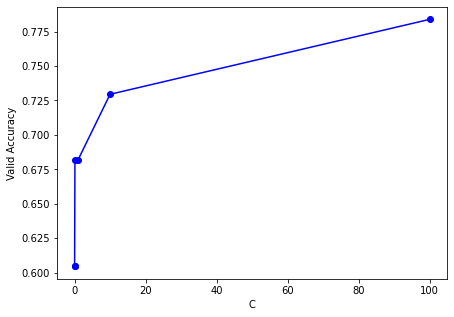

In [37]:
fig, ax = plt.subplots(figsize = (7,5))

ax.plot(result.C, result.Valid_acc, 'o-', c='blue')

ax.set_xlabel('C')
ax.set_ylabel('Valid Accuracy')

In [38]:
model6 = SVC(C=100)
model6.fit(X_train, y_train)

svm_train_pred = model6.predict(X_train)
svm_test_pred = model6.predict(X_test)

svm_train_acc = accuracy_score(y_train, svm_train_pred)
svm_test_acc = accuracy_score(y_test, svm_test_pred)

print('Train Accuracy of SVM of C=100 is {:.3f}'.format(svm_train_acc))
print('Test Accuracy of SVM of C=100 is {:.3f}'.format(svm_test_acc))

Train Accuracy of SVM of C=100 is 0.807
Test Accuracy of SVM of C=100 is 0.790


First the default SVM of C=1 has the accuracy score on training set of 0.685 and the accuracy score on test set of 0.636. 
  
Then by using cross-validation, we can see that with the increase in C, there will be less regulation and the validation accuracy increases.  
  
When we choose C=100, we have the best validation accuracy. The test performance with SVM for the best choice of C is 0.790, which is a little bit higher than that from decision tree in 2.3

## 2.5 Missing Data, Imputation and Feature Engineering

Have you been paying close attention to your features? If not, now is a good time to start. Perform analysis that allows you to answer the following questions:
* Recall from part 1 that some features have missing data. Which features have missingness?
* Try running the decision tree and SVM models from part 1 using all columns, including those with missing data. What happens?
* Use one of the methods we discussed in class to impute missing values for each feature. For each feature with missingness, describe the method used and why it is appropriate to the feature.
* Find a way to engineer meaningful features from the "Name" and/or "Cabin" fields in the data.
* Rerun your decision tree and SVM on the new dataset with imputed missing values and the new features, including re-selecting hyperparameters via cross validation. What do you notice?

In [39]:
# Features with missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The Age, Cabin and Embarked have missingness  
  
With missing data, running the models(decision trees and SVMs) gives out the error. We need to take care of the features with missing values.

In [40]:
# Deal with the missing values
# Cabin:
# Since there are too many missing values (687, 77.10%) for the 'Cabin' feature, so I decide to just drop this feature.

new_df = data.drop('Cabin',axis = 1)

# Age:
# The number of missing values for the age feature is quite acceptable and I plan to fill the missing value with the median value of the age feature
# The reason of using median is that the age feature is a numerical feature and the distribution of age is a little bit skewed.
new_df['Age'].fillna(new_df['Age'].median(), inplace = True)

# Embarked
# The number of missing values for the Embarked feature is only 2. So I just plan to use the mode to replace the missing value.
new_df['Embarked'].fillna(new_df['Embarked'].mode()[0], inplace = True)

new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [41]:
# Feature Engineering

# I plan to drop the PassengerId and Ticket
new_df.drop(['PassengerId','Ticket'],axis=1,inplace=True)

# Change the sex and embarked by getting dummy variables
new_df['Sex'] = new_df['Sex'].astype('category')
new_df = pd.get_dummies(new_df, columns=['Sex'])
new_df = pd.get_dummies(new_df, columns=['Embarked'])

# We may also change the Pclass into dummy variables
new_df['Pclass'] = new_df['Pclass'].astype('category')
new_df = pd.get_dummies(new_df, columns=['Pclass'])

In [42]:
# Dealing with 'Name' feature

name = new_df['Name']
new_df['Title'] = [i.split(".")[0].split(",")[-1].strip() for i in name]

In [43]:
new_df['Title'].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

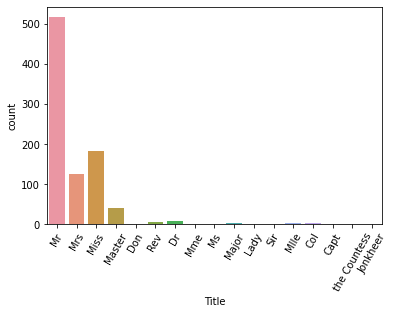

In [44]:
sns.countplot(x="Title", data = new_df)
plt.xticks(rotation = 60)
plt.show()

In [45]:
# convert to categorical
new_df["Title"] = new_df["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")
new_df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in new_df["Title"]]
new_df["Title"].head(20)

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     0
8     1
9     1
10    1
11    1
12    2
13    2
14    1
15    1
16    0
17    2
18    1
19    1
Name: Title, dtype: int64

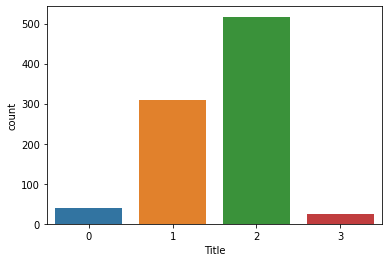

In [46]:
sns.countplot(x="Title", data = new_df)
plt.show()

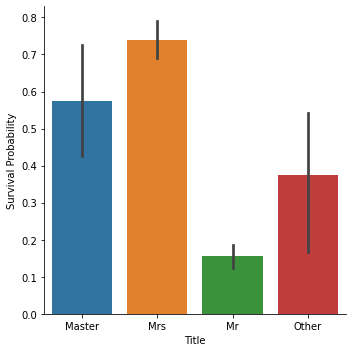

In [47]:
g = sns.catplot(x = "Title", y = "Survived", data = new_df, kind = "bar")
g.set_xticklabels(["Master","Mrs","Mr","Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [48]:
new_df.drop('Name',axis=1,inplace=True)
new_df = pd.get_dummies(new_df,columns=['Title'])

In [49]:
# Family Size

new_df['Family Size'] = new_df['SibSp'] + new_df['Parch'] + 1
new_df['IsAlone'] = [0 if i > 1 else 0 for i in new_df['Family Size']]

In [50]:
new_df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Title_0,Title_1,Title_2,Title_3,Family Size,IsAlone
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1,0,0,1,0,2,0
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0,0,1,0,0,2,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1,0,1,0,0,1,0
3,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0,0,1,0,0,2,0
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1,0,0,1,0,1,0


In [51]:
new_df.shape

(891, 19)

In [52]:
# Split the training and test set
X = new_df.drop(['Survived'],axis=1)
y = new_df['Survived']

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

print('The shape of x_train is {}'.format(x_train.shape))
print('The shape of x_test is {}'.format(x_test.shape))
print('The shape of y_train is {}'.format(y_train.shape))
print('The shape of y_test is {}'.format(y_test.shape))

The shape of x_train is (712, 18)
The shape of x_test is (179, 18)
The shape of y_train is (712,)
The shape of y_test is (179,)


In [55]:
# Rerun your decision tree and SVM on the new dataset with imputed missing values and the new features, including re-selecting hyperparameters via cross validation. 

# Decision Tree
max_depths = list(range(1,10))
min_samples_leafs = list(range(1,10))
cv_valid_acc = []
max_depth_list = []
min_samples_leaf_list = []

for depth in max_depths:
    for min_leaf in min_samples_leafs:
        model = DecisionTreeClassifier(max_depth = depth, min_samples_leaf = min_leaf)
        result = cross_validate(model, x_train, y_train, cv = 10)
        cv_valid_acc.append(np.mean(result['test_score']))
        max_depth_list.append(depth)
        min_samples_leaf_list.append(min_leaf)
        
result = pd.DataFrame({'max_depth':max_depth_list,
                       'min_samples_leaf':min_samples_leaf_list,
                       'Valid_acc':cv_valid_acc})
result

,max_depth,min_samples_leaf,Valid_acc
0,1,1,0.773865
1,1,2,0.773865
2,1,3,0.773865
3,1,4,0.773865
4,1,5,0.773865
...,...,...,...
76,9,5,0.823063
77,9,6,0.808998
78,9,7,0.804812
79,9,8,0.797868


In [56]:
max_valid_acc = result.Valid_acc.max()
max_valid_acc_idx = result[result.Valid_acc == max_valid_acc].index.values
result.loc[max_valid_acc_idx]

,max_depth,min_samples_leaf,Valid_acc
18,3,1,0.824452
19,3,2,0.824452
20,3,3,0.824452
21,3,4,0.824452
22,3,5,0.824452
23,3,6,0.824452
24,3,7,0.824452


In [57]:
# Decision tree with the max depth of 3 and min samples leaf of 1
model7 = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 1)
model7.fit(x_train, y_train)

train_pred_dtc = model7.predict(x_train)
test_pred_dtc = model7.predict(x_test)

train_acc_dtc = accuracy_score(y_train, train_pred_dtc)
test_acc_dtc = accuracy_score(y_test, test_pred_dtc)

print('The accuracy of a decision tree of max_depth of 3 and min samples leaf of 1 on the training set is {:.3f}'.format(train_acc_dtc))  
print()
print('The accuracy of a decision tree of max_depth of 3 and min samples leaf of 1 on the test set is {:.3f}'.format(test_acc_dtc))

The accuracy of a decision tree of max_depth of 3 and min samples leaf of 1 on the training set is 0.833

The accuracy of a decision tree of max_depth of 3 and min samples leaf of 1 on the test set is 0.816


In [58]:
c_list = [0.001, 0.01, 0.1, 1, 10, 100]
svm_cv_valid_acc = []

for c in c_list:
    model = SVC(C = c)
    result = cross_validate(model, x_train, y_train, cv=10)
    svm_cv_valid_acc.append(np.mean(result['test_score']))
    
result = pd.DataFrame({'C':c_list,
                       'Valid_acc':svm_cv_valid_acc})
result

,C,Valid_acc
0,0.001,0.623592
1,0.010,0.623592
2,0.100,0.665630
3,1.000,0.676937
4,10.000,0.751428
5,100.000,0.806182


In [59]:
model8 = SVC(C=100)
model8.fit(x_train, y_train)

svm_train_pred = model8.predict(x_train)
svm_test_pred = model8.predict(x_test)

svm_train_acc = accuracy_score(y_train, svm_train_pred)
svm_test_acc = accuracy_score(y_test, svm_test_pred)

print('Train Accuracy of SVM of C=100 is {:.3f}'.format(svm_train_acc))
print('Test Accuracy of SVM of C=100 is {:.3f}'.format(svm_test_acc))

Train Accuracy of SVM of C=100 is 0.826
Test Accuracy of SVM of C=100 is 0.788


After reruning the decision tree and SVM models with the new dataframe by feature engineering, I find that the test performance of decision tree model on the new dataframe is better than before. The test performace of SVM model is similar to the one before.

## 2.6 ROC Curve

For your best decision tree from 2.5, plot the reciever operating characteristic (ROC) curve on the test set data. Report the area under the curve (AUC) score. *Hint*: scikit-learn's built-in predict_proba function may be helpful for this problem.  For each model, identify the point on the ROC curve that is closest to the top-left corner, and identify the associated probability threshold for classification. Place a vertical line on your plot indicating the FPR value at the threshold. Finally, report accuracy on the test set using the threshold you identified. Comparing to the accuracy from 2.5, what do you observe? 

In [60]:
dtc_prob_pred = model7.predict_proba(x_test)
dtc_prob_pred = dtc_prob_pred[:,1]

dtc_fpr, dtc_tpr, dtc_threshold = roc_curve(y_test, dtc_prob_pred)

df_fpr_tpr = pd.DataFrame({'FPR': dtc_fpr,
                           'TPR': dtc_tpr,
                           'Threshold':dtc_threshold})
df_fpr_tpr.head()

,FPR,TPR,Threshold
0,0.000000,0.000000,1.963504
1,0.038095,0.500000,0.963504
2,0.123810,0.729730,0.607843
3,0.161905,0.756757,0.388889
4,0.304762,0.918919,0.344828


In [61]:
# Calculate the G-mean
gmean = np.sqrt(dtc_tpr * (1 - dtc_fpr))

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(dtc_threshold[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(dtc_fpr[index], ndigits = 4)
tprOpt = round(dtc_tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

Best Threshold: 0.6078 with G-Mean: 0.7996
FPR: 0.1238, TPR: 0.7297


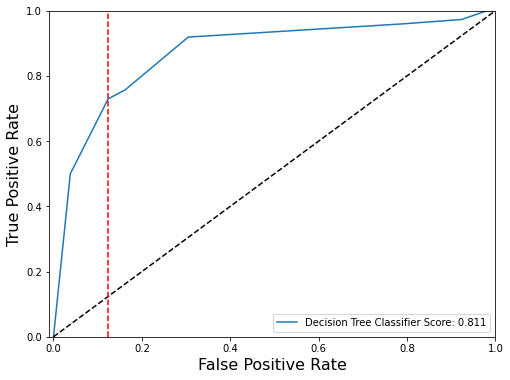

In [62]:
plt.figure(figsize=(8,6))
plt.plot(dtc_fpr, dtc_tpr, label='Decision Tree Classifier Score: {:.3f}'.format(roc_auc_score(y_train, train_pred_dtc)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.axvline(x = fprOpt, color = 'r', linestyle='--')
plt.legend()
plt.show()

In [63]:
dtc_y_prob_pred = [1 if i >= 0.6078 else 0 for i in dtc_prob_pred]
dtc_y_prob_acc = accuracy_score(y_test, dtc_y_prob_pred)
print('Accuracy of this tree of threshold of 0.6078 is {:.3f}'.format(dtc_y_prob_acc))

Accuracy of this tree of threshold of 0.6078 is 0.816


ROC curve on the test set is plotted above. The AUC score is 0.811.  
  
The point on the ROC curve that is closest to the top-left corner is the point with FPR: 0.1238, TPR: 0.7297. The associated probability threshold for classification is 0.6078. The accuracy on the test set using the threshold is 0.816 which is the same as test accuracy of the tree in 2.5

# Part 3: Many Trees

## 3.1: Random Forest
Use the [random forest classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to predict survival on the titanic. Use cross-validation on the training data to choose the best hyper-parameters --- including the maximum depth, number of trees in the forest, and the minimum samples per leaf.
* What hyperparameters did you select with cross-validation? You should use cross-validation to select all of the hyperparameters (i.e. search a grid of hyperparameters), and report the combination that maximizes cross-validated accuracy). You can use fewer cross validation folds than the 10 folds from previous problems, to keep your code from taking too long to run.
* How does the cross-validated performance (average across validation folds) compare to the test performance (using the top-performing, fitted model selected through cross-validation)?
* How does the RF performance compare to the decision tree and SVM from part 2.5?
* Create 3 subplots that show how cross-validated performance (y-axis) relates to the number of trees in the forest (x-axis), maximum depth (x-axis), and minimum samples per leaf (x-axis). What do you observe?

In [64]:
from sklearn.ensemble import RandomForestClassifier

max_depths = list(range(1,10))
number_of_tree = list(range(1,10))
min_samples_leaf = list(range(1,10))

cv_train_accuracy = []
cv_valid_accuracy = []
max_depth_list = []
n_tree_list = []
min_sample_leaf_list = []

for depth in max_depths:
    for n_tree in number_of_tree:
        for min_leaf in min_samples_leaf:
            model = RandomForestClassifier(max_depth = depth, n_estimators = n_tree, min_samples_leaf = min_leaf, random_state = 42)
            result = cross_validate(model, x_train, y_train, cv = 5, return_train_score = True)
            cv_train_accuracy.append(np.mean(result['train_score']))
            cv_valid_accuracy.append(np.mean(result['test_score']))
            max_depth_list.append(depth)
            n_tree_list.append(n_tree)
            min_sample_leaf_list.append(min_leaf)
            
result = pd.DataFrame({'Max_depth': max_depth_list,
                       'N_trees': n_tree_list,
                       'Min_sample_leaf':min_sample_leaf_list,
                       'Train_acc':cv_train_accuracy,
                       'Valid_acc':cv_valid_accuracy})
result.head()

,Max_depth,N_trees,Min_sample_leaf,Train_acc,Valid_acc
0,1,1,1,0.787568,0.785059
1,1,1,2,0.787568,0.785059
2,1,1,3,0.787568,0.785059
3,1,1,4,0.787568,0.785059
4,1,1,5,0.787568,0.785059


In [65]:
max_valid_acc = result.Valid_acc.max()
max_valid_acc_idx = result[result.Valid_acc == max_valid_acc].index.values
result.loc[max_valid_acc_idx]

,Max_depth,N_trees,Min_sample_leaf,Train_acc,Valid_acc
687,9,5,4,0.857088,0.838471


In [67]:
model9 = RandomForestClassifier(max_depth=9, n_estimators=5, min_samples_leaf=4, random_state = 42)
model9.fit(x_train,y_train)

rf_train_pred = model9.predict(x_train)
rf_test_pred = model9.predict(x_test)

rf_train_acc = accuracy_score(y_train, rf_train_pred)
rf_test_acc = accuracy_score(y_test,rf_test_pred)

print('The training accuracy of top-performing random forest classifier model on the training set is {:.3f}'.format(rf_train_acc))
print('The test accuracy of top-performing random forest classifier model on the test set is {:.3f}'.format(rf_test_acc))

The training accuracy of top-performing random forest classifier model on the training set is 0.858
The test accuracy of top-performing random forest classifier model on the test set is 0.821


Text(0.5, 1.0, 'Cross-validated Accuracy vs Max depth of Random Forest')

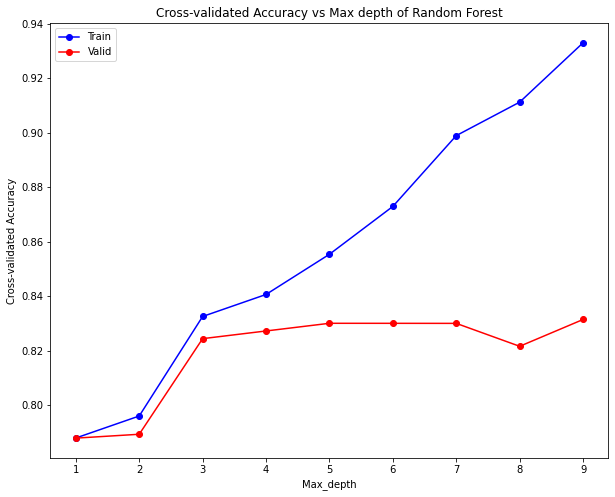

In [68]:
max_depths = list(range(1,10))

cv_train_accuracy = []
cv_valid_accuracy = []
max_depth_list = []

for depth in max_depths:
    model = RandomForestClassifier(max_depth = depth, random_state = 42)
    result = cross_validate(model, x_train, y_train, cv = 5, return_train_score = True)
    cv_train_accuracy.append(np.mean(result['train_score']))
    cv_valid_accuracy.append(np.mean(result['test_score']))
    max_depth_list.append(depth)
    
result = pd.DataFrame({'Max_depth': max_depth_list,
                       'Train_acc':cv_train_accuracy,
                       'Valid_acc':cv_valid_accuracy})
    
f, ax1 = plt.subplots(1,1, figsize = (10,8))

ax1.plot(result.Max_depth, result.Train_acc, 'o-', c='blue', label = 'Train')
ax1.plot(result.Max_depth, result.Valid_acc, 'o-', c='red', label='Valid')
ax1.legend()
ax1.set_xlabel('Max_depth')
ax1.set_ylabel('Cross-validated Accuracy')
ax1.set_title('Cross-validated Accuracy vs Max depth of Random Forest')

Text(0.5, 1.0, 'Cross-validated Accuracy vs Number of Trees in Forest')

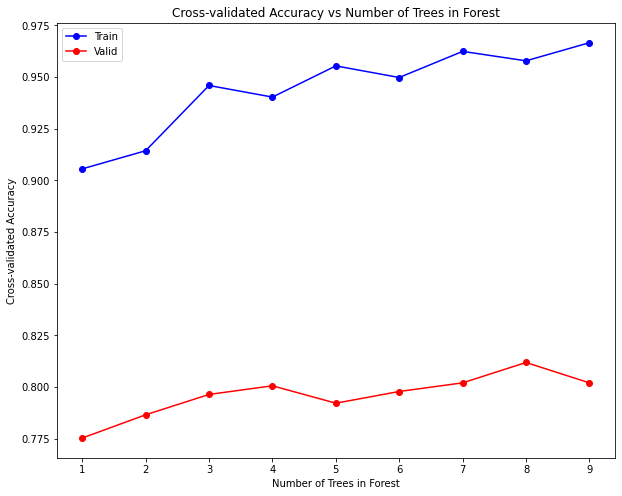

In [69]:
number_of_tree = list(range(1,10))

cv_train_accuracy = []
cv_valid_accuracy = []
n_tree_list = []

for n_tree in number_of_tree:
    model = RandomForestClassifier(n_estimators = n_tree, random_state = 42)
    result = cross_validate(model, x_train, y_train, cv = 5, return_train_score = True)
    cv_train_accuracy.append(np.mean(result['train_score']))
    cv_valid_accuracy.append(np.mean(result['test_score']))
    n_tree_list.append(n_tree)
    
result = pd.DataFrame({'N_trees': n_tree_list,
                       'Train_acc':cv_train_accuracy,
                       'Valid_acc':cv_valid_accuracy})
    
f, ax1 = plt.subplots(1,1, figsize = (10,8))

ax1.plot(result.N_trees, result.Train_acc, 'o-', c='blue', label = 'Train')
ax1.plot(result.N_trees, result.Valid_acc, 'o-', c='red', label='Valid')
ax1.legend()
ax1.set_xlabel('Number of Trees in Forest')
ax1.set_ylabel('Cross-validated Accuracy')
ax1.set_title('Cross-validated Accuracy vs Number of Trees in Forest')

Text(0.5, 1.0, 'Cross-validated Accuracy vs Min Sample Leaf')

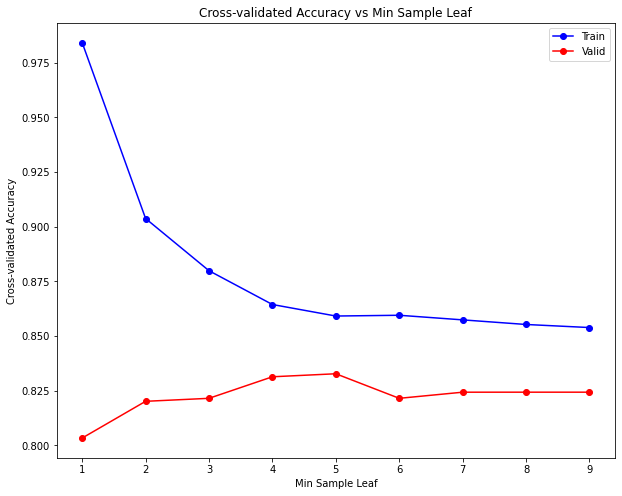

In [70]:
min_samples_leaf = list(range(1,10))

cv_train_accuracy = []
cv_valid_accuracy = []
min_sample_leaf_list = []

for min_leaf in min_samples_leaf:
    model = RandomForestClassifier(min_samples_leaf = min_leaf, random_state = 42)
    result = cross_validate(model, x_train, y_train, cv = 5, return_train_score = True)
    cv_train_accuracy.append(np.mean(result['train_score']))
    cv_valid_accuracy.append(np.mean(result['test_score']))
    min_sample_leaf_list.append(min_leaf)
    
result = pd.DataFrame({'Min_sample_leaf':min_sample_leaf_list,
                       'Train_acc':cv_train_accuracy,
                       'Valid_acc':cv_valid_accuracy})
    
f, ax1 = plt.subplots(1,1, figsize = (10,8))

ax1.plot(result.Min_sample_leaf, result.Train_acc, 'o-', c='blue', label = 'Train')
ax1.plot(result.Min_sample_leaf, result.Valid_acc, 'o-', c='red', label='Valid')
ax1.legend()
ax1.set_xlabel('Min Sample Leaf')
ax1.set_ylabel('Cross-validated Accuracy')
ax1.set_title('Cross-validated Accuracy vs Min Sample Leaf')

* Hyperparameters I select with cross-validation: max_depth, n_estimators, min_samples_leaf  

* The highest cross-validated performance is 0.838 with max_depth of 9, n_estimators of 5, min_samples_leaf of 4. The test performance (using the top-performing, fitted model selected through cross-validation) is 0.821  

* In terms of top-performing model of each model, the test performance of random forest is 0.821, the test performance of decision tree is 0.816 and the test performace of SVM is 0.788. The random forest model outperforms of all the three models so far  

* Three subplots of how cross-validated performace relates to each of three hyperparameters are shown above. There exist some difference between the training accuracy and validation accuracy, which is reasonable. The training accuracy is quite sensitive to the changes of hyperparameter, compared to the validation accuracy. When I perform the cross-validation on the single hyparameter, the optimal hyperparameter (using the highest validation accuracy) are quite similar to the ones I performed cross-validation on a combination of these three hyperparameters. The optimal max depth is still 9. The optimal min sample leaf has changed from 4 to 5. The optimal number of trees in the forest has changed from 5 to 8.

## 3.2: Gradient Boosting

Use the [Gradient Boosting classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) to predict survival on the Titanic. Tune your hyperparameters with cross validation. Again, you should tune more parameteres than just `max_depth`.
* How does the GBM performance compare to the other models?
* Create a figure showing the feature importances in your final model (with properly tuned hyperparameters)


In [71]:
from sklearn.ensemble import GradientBoostingClassifier

learning_rates = [0.001, 0.01, 0.1, 0.5, 1]
max_depths = list(range(1,10))
n_estimators = [100,200,300,400,500,600]

cv_train_acc = []
cv_valid_acc = []
lr_list = []
depth_list = []
n_tree_list = []

for lr in learning_rates:
    for depth in max_depths:
        for n_tree in n_estimators:
            model = GradientBoostingClassifier(n_estimators=n_tree,learning_rate=lr,max_depth = depth, random_state = 42)
            result = cross_validate(model, x_train, y_train, cv = 5, return_train_score = True)
            cv_train_acc.append(np.mean(result['train_score']))
            cv_valid_acc.append(np.mean(result['test_score']))
            lr_list.append(lr)
            depth_list.append(depth)
            n_tree_list.append(n_tree)
            
result = pd.DataFrame({'N_trees':n_tree_list,
                       'Learning_rate': lr_list,
                       'Max_depth':depth_list,
                       'Train_acc':cv_train_acc,
                       'Valid_acc':cv_valid_acc})
result.head()

,N_trees,Learning_rate,Max_depth,Train_acc,Valid_acc
0,100,0.001,1,0.623596,0.623599
1,200,0.001,1,0.623596,0.623599
2,300,0.001,1,0.623596,0.623599
3,400,0.001,1,0.623596,0.623599
4,500,0.001,1,0.787918,0.787876


In [72]:
max_valid_acc = result.Valid_acc.max()
max_valid_acc_idx = result[result.Valid_acc == max_valid_acc].index.values
result.loc[max_valid_acc_idx]

,N_trees,Learning_rate,Max_depth,Train_acc,Valid_acc
74,300,0.01,4,0.898877,0.831409
112,500,0.10,1,0.850772,0.831409


In [73]:
model10 = GradientBoostingClassifier(n_estimators=300, learning_rate = 0.01, max_depth = 4, random_state = 42)
model10.fit(x_train, y_train)

gbc_train_pred = model10.predict(x_train)
gbc_test_pred = model10.predict(x_test)

gbc_train_acc = accuracy_score(y_train, gbc_train_pred)
gbc_test_acc = accuracy_score(y_test, gbc_test_pred)

print('The training accuracy of top-performing gradient boosting model is {:.3f}'.format(gbc_train_acc))
print('The test accuracy of top-performing gradient boosting model is {:.3f}'.format(gbc_test_acc))

The training accuracy of top-performing gradient boosting model is 0.886
The test accuracy of top-performing gradient boosting model is 0.832


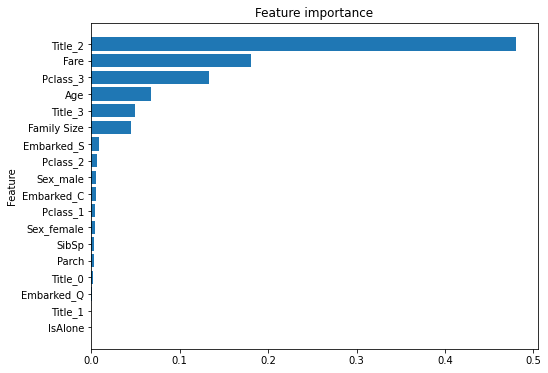

In [74]:
# Feature Importance
plt.figure(figsize = (8,6))
features_plot = x_train.columns
importances = model10.feature_importances_
idx = np.argsort(importances) # sort ascendingly, mark index
plt.title("Feature importance")
plt.barh(range(len(idx)), importances[idx])
plt.yticks(range(len(idx)), [features_plot[i] for i in idx])
plt.ylabel("Feature")
plt.show()

* The GBM accuracy performace on the test set is 0.832, which is better than before. The random forest model accuracy performace on the test set os 0.821
* The Figure about the feature importances is shown above.

# Part 4: Neural Networks

Carry on the classification by using feed forward neural networks, using functionality imported from [keras](https://keras.io/api/). You are responsible for choosing the number of layers, their corresponding size, the activation functions and the choice of gradient descent algorithm (and its parameters e.g. learning rate). Pick those parameters by hand. For some of them you can also perform cross-validation if you wish, but cross validation is not required. Your goal is to tune those parameters so that your test accuracy is at least above 75%. 

Report your accuracy on the test set along with your choice of parameters. More specifically, report the number of layers, their size, the activation functions and your choice of optimization algorithm. 

It is a good exercise to experiment with different optimizers (gradient descent, stochastic gradient descent, AdaGrad etc), learning rates, batch sizes etc. to get a feeling of how they affect neural network training. Experiment with some of these options. What do you observe?

In [75]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
import tensorflow as tf
import keras

np.random.seed(42)
tf.random.set_seed(42)

model11 = Sequential()
model11.add(Dense(units = 32, input_shape = (18,), activation='relu'))
model11.add(Dense(units = 64, activation='relu',kernel_initializer = 'he_normal', use_bias = False))
model11.add(tf.keras.layers.BatchNormalization())
model11.add(Dense(units = 128, activation = 'relu',kernel_initializer = 'he_normal', use_bias = False))
model11.add(Dropout(0.1))
model11.add(Dense(units = 64, activation = 'relu',kernel_initializer = 'he_normal', use_bias = False))
model11.add(Dense(units =1 , activation = 'sigmoid'))
model11.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model11.fit(x_train, y_train, epochs=200, batch_size=32, verbose=0)
nn_train_pred = model11.predict(x_train)
nn_test_pred = model11.predict(x_test)

2022-03-29 22:18:38.686706: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [76]:
nn_train_pred = (nn_train_pred > 0.5).astype(int)
nn_test_pred = (nn_test_pred > 0.5).astype(int)
nn_train_acc = accuracy_score(y_train, nn_train_pred)
nn_test_acc = accuracy_score(y_test, nn_test_pred)

print('The neural networks accuracy on the training set is {:.3f}'.format(nn_train_acc))
print('The neural networks accuracy on the test set is {:.3f}'.format(nn_test_acc))

The neural networks accuracy on the training set is 0.874
The neural networks accuracy on the test set is 0.821


In [77]:
model11.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                608       
                                                                 
 dense_1 (Dense)             (None, 64)                2048      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 128)               8192      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8192      
                                                        

The number of layers: 7. 
The size of each layer is shown above in the summary.   
The activation function in the first 6 layers is the ReLu and Sigmoid at the output layer.  
The optimization algorithm is Adam.  
The loss is binary_crossentropy and the metric is accuracy.   
The batch size is 32 and the epochs is 200  
  
The test accuracy is 0.821  
  
By trying different optimization algorithm, I find that the sgd and adam performs better than gradient descend. And different combination of the hyperparameter changes a lot on the test accuracy. Roughly speaking, adding more layers, adding batchnormalization and dropout may contribute to the accuracy

# Part 5: Putting it all together!

Create a final table that summarizes the performance of your models as follows. What do you observe? Are there trends in which models and hyperparameters work best?

| Model | Cross-validated Performance   | Train Performance | Test Performance | Chosen Hyperparameters | 
|------|------|------| | |
|   Decision Tree        |  |  |  |  |
|   Decision Tree (with imputed missing values and new features) |  |  |  |  |
|   SVM  |  |  |  |  |
|   SVM (with imputed missing values and new features)        |  |  |  |  |
|   Random Forest        |  |  |  |  |
|   Random Forest (with imputed missing values and new features)        |  |   |  | |
|   Gradient Boosting    |  |  |  |  |
|   Gradient Boosting (with imputed missing values and new features)        |  |  |  |  |
|   Neural Network    |  |  |  |  |
|   Neural Network (with imputed missing values and new features)        |  |   |  |  |

In [79]:
# We first need to record how random forest, gradient boosting and neural networks perform on the dataset without imputed missing values and new features.
# This is the data_raw.

X = data_raw.drop(['Survived'],axis = 1)
y = data_raw['Survived']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print('The shape of X_train is {}'.format(x_train.shape))
print('The shape of X_test is {}'.format(x_test.shape))
print('The shape of y_train is {}'.format(y_train.shape))
print('The shape of y_test is {}'.format(y_test.shape))

The shape of X_train is (569, 7)
The shape of X_test is (143, 7)
The shape of y_train is (569,)
The shape of y_test is (143,)


In [80]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

max_depths = list(range(1,10))
number_of_tree = list(range(1,10))
min_samples_leaf = list(range(1,10))

cv_train_accuracy = []
cv_valid_accuracy = []
max_depth_list = []
n_tree_list = []
min_sample_leaf_list = []

for depth in max_depths:
    for n_tree in number_of_tree:
        for min_leaf in min_samples_leaf:
            model = RandomForestClassifier(max_depth = depth, n_estimators = n_tree, min_samples_leaf = min_leaf, random_state = 42)
            result = cross_validate(model, x_train, y_train, cv = 5, return_train_score = True)
            cv_train_accuracy.append(np.mean(result['train_score']))
            cv_valid_accuracy.append(np.mean(result['test_score']))
            max_depth_list.append(depth)
            n_tree_list.append(n_tree)
            min_sample_leaf_list.append(min_leaf)
            
result = pd.DataFrame({'Max_depth': max_depth_list,
                       'N_trees': n_tree_list,
                       'Min_sample_leaf':min_sample_leaf_list,
                       'Train_acc':cv_train_accuracy,
                       'Valid_acc':cv_valid_accuracy})
result.head()

,Max_depth,N_trees,Min_sample_leaf,Train_acc,Valid_acc
0,1,1,1,0.624344,0.615153
1,1,1,2,0.624344,0.615153
2,1,1,3,0.624344,0.615153
3,1,1,4,0.624344,0.615153
4,1,1,5,0.624344,0.615153


In [81]:
max_valid_acc = result.Valid_acc.max()
max_valid_acc_idx = result[result.Valid_acc == max_valid_acc].index.values
result.loc[max_valid_acc_idx]

,Max_depth,N_trees,Min_sample_leaf,Train_acc,Valid_acc
616,8,6,5,0.852385,0.824282
640,8,9,2,0.901588,0.824282


In [84]:
model12 = RandomForestClassifier(max_depth=8, n_estimators=6, min_samples_leaf=5, random_state = 42)
model12.fit(x_train,y_train)

rf_train_pred = model12.predict(x_train)
rf_test_pred = model12.predict(x_test)

rf_train_acc = accuracy_score(y_train, rf_train_pred)
rf_test_acc = accuracy_score(y_test,rf_test_pred)

print('The training accuracy of top-performing random forest classifier model on the training set is {:.3f}'.format(rf_train_acc))
print('The test accuracy of top-performing random forest classifier model on the test set is {:.3f}'.format(rf_test_acc))

The training accuracy of top-performing random forest classifier model on the training set is 0.852
The test accuracy of top-performing random forest classifier model on the test set is 0.811


In [85]:
# GBM

from sklearn.ensemble import GradientBoostingClassifier

learning_rates = [0.001, 0.01, 0.1, 0.5, 1]
max_depths = list(range(1,10))
n_estimators = [100,200,300,400,500,600]

cv_train_acc = []
cv_valid_acc = []
lr_list = []
depth_list = []
n_tree_list = []

for lr in learning_rates:
    for depth in max_depths:
        for n_tree in n_estimators:
            model = GradientBoostingClassifier(n_estimators=n_tree,learning_rate=lr,max_depth = depth, random_state = 42)
            result = cross_validate(model, x_train, y_train, cv = 5, return_train_score = True)
            cv_train_acc.append(np.mean(result['train_score']))
            cv_valid_acc.append(np.mean(result['test_score']))
            lr_list.append(lr)
            depth_list.append(depth)
            n_tree_list.append(n_tree)
            
result = pd.DataFrame({'N_trees':n_tree_list,
                       'Learning_rate': lr_list,
                       'Max_depth':depth_list,
                       'Train_acc':cv_train_acc,
                       'Valid_acc':cv_valid_acc})
result.head()

,N_trees,Learning_rate,Max_depth,Train_acc,Valid_acc
0,100,0.001,1,0.604569,0.604565
1,200,0.001,1,0.604569,0.604565
2,300,0.001,1,0.604569,0.604565
3,400,0.001,1,0.787348,0.787378
4,500,0.001,1,0.787348,0.787378


In [86]:
max_valid_acc = result.Valid_acc.max()
max_valid_acc_idx = result[result.Valid_acc == max_valid_acc].index.values
result.loc[max_valid_acc_idx]

,N_trees,Learning_rate,Max_depth,Train_acc,Valid_acc
77,600,0.01,4,0.938492,0.826036


In [87]:
model13 = GradientBoostingClassifier(n_estimators=600, learning_rate = 0.01, max_depth = 4, random_state = 42)
model13.fit(x_train, y_train)

gbc_train_pred = model13.predict(x_train)
gbc_test_pred = model13.predict(x_test)

gbc_train_acc = accuracy_score(y_train, gbc_train_pred)
gbc_test_acc = accuracy_score(y_test, gbc_test_pred)

print('The training accuracy of top-performing gradient boosting model is {:.3f}'.format(gbc_train_acc))
print('The test accuracy of top-performing gradient boosting model is {:.3f}'.format(gbc_test_acc))

The training accuracy of top-performing gradient boosting model is 0.924
The test accuracy of top-performing gradient boosting model is 0.783


In [90]:
# Neural Network
np.random.seed(42)
tf.random.set_seed(42)

model11 = Sequential()
model11.add(Dense(units = 32, input_shape = (7,), activation='relu'))
model11.add(Dense(units = 64, activation='relu',kernel_initializer = 'he_normal', use_bias = False))
model11.add(tf.keras.layers.BatchNormalization())
model11.add(Dense(units = 128, activation = 'relu',kernel_initializer = 'he_normal', use_bias = False))
model11.add(Dropout(0.1))
model11.add(Dense(units = 64, activation = 'relu',kernel_initializer = 'he_normal', use_bias = False))
model11.add(Dense(units =1 , activation = 'sigmoid'))
model11.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model11.fit(x_train, y_train, epochs=200, batch_size=32, verbose=0)
nn_train_pred = model11.predict(x_train)
nn_test_pred = model11.predict(x_test)

nn_train_pred = (nn_train_pred > 0.5).astype(int)
nn_test_pred = (nn_test_pred > 0.5).astype(int)
nn_train_acc = accuracy_score(y_train, nn_train_pred)
nn_test_acc = accuracy_score(y_test, nn_test_pred)

print('The neural networks accuracy on the training set is {:.3f}'.format(nn_train_acc))
print('The neural networks accuracy on the test set is {:.3f}'.format(nn_test_acc))

The neural networks accuracy on the training set is 0.875
The neural networks accuracy on the test set is 0.762


In [92]:
model = ['Decision Tree', 'Decision Tree (with imputed missing values and new features)',
         'SVM','SVM (with imputed missing values and new features)',
         'Random Forest','Random Forest (with imputed missing values and new features)',
         'Gradient Boosting','Gradient Boosting (with imputed missing values and new features)',
         'Neural Network','Neural Network (with imputed missing values and new features)']

cross_validated_performance = ['0.805','0.824','0.784','0.806','0.824','0.838','0.826','0.831','N/A','N/A']
train_performance = ['0.865','0.833','0.807','0.826','0.852','0.858','0.924','0.886','0.875','0.874']
test_performance = ['0.741','0.816','0.790','0.788','0.811','0.821','0.783','0.832','0.762','0.821']

chosen_hyper = ['max_depth, min_samples_leaf','max_depth, min_samples_leaf',
                'C','C',
                'max_depth, n_estimators, min_sample_leaf', 'max_depth, n_estimators, min_sample_leaf',
                'n_estimators, learning_rate, max_depth', 'n_estimators, learning_rate, max_depth',
                'batch_size, epoch, activation, optimizer, metrics', 'batch_size, epoch, activation, optimizer, metrics']
performance_table = pd.DataFrame({'Model':model,
                                  'Cross-validated Performance':cross_validated_performance,
                                  'Train Performance': train_performance,
                                  'Test Performance': test_performance,
                                  'Chosen Hyperparameters':chosen_hyper})
performance_table = performance_table.style.set_properties(**{'text-align': 'left'})
performance_table = performance_table.set_table_styles([dict(selector = 'th', props=[('text-align', 'left')])])
performance_table

,Model,Cross-validated Performance,Train Performance,Test Performance,Chosen Hyperparameters
0,Decision Tree,0.805,0.865,0.741,"max_depth, min_samples_leaf"
1,Decision Tree (with imputed missing values and new features),0.824,0.833,0.816,"max_depth, min_samples_leaf"
2,SVM,0.784,0.807,0.790,C
3,SVM (with imputed missing values and new features),0.806,0.826,0.788,C
4,Random Forest,0.824,0.852,0.811,"max_depth, n_estimators, min_sample_leaf"
5,Random Forest (with imputed missing values and new features),0.838,0.858,0.821,"max_depth, n_estimators, min_sample_leaf"
6,Gradient Boosting,0.826,0.924,0.783,"n_estimators, learning_rate, max_depth"
7,Gradient Boosting (with imputed missing values and new features),0.831,0.886,0.832,"n_estimators, learning_rate, max_depth"
8,Neural Network,N/A,0.875,0.762,"batch_size, epoch, activation, optimizer, metrics"
9,Neural Network (with imputed missing values and new features),N/A,0.874,0.821,"batch_size, epoch, activation, optimizer, metrics"


*Your observations here*

# Part 6: (Extra credit) Flex your ML chops

Add additional rows to the table from Part 5 based on other models you've learned in class.
 - Which models perform the best, using the default parameters (i.e., no hyperparameter tuning)?
 - How do models perform in terms of performance metrics beyond accuracy? (e.g. AUC score, precision, recall) 
 - For which models does careful hyperparameter tuning make the biggest different? Why do you think that is the case?
 - Which tuned model has the largest gap between cross-validated performance and test performance? Why might that be?

In [104]:
# Logistic Regression on data without imputed missing values and new features
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

solvers = ['newton-cg', 'lbfgs', 'liblinear']
c_values = [100, 10, 1.0, 0.1, 0.01]

cv_train_acc = []
cv_valid_acc = []
solver_list = []
c_list = []

for solver in solvers:
    for c in c_values:
        model = LogisticRegression(solver = solver, C = c, penalty = 'l2', max_iter = 100, random_state = 42)
        result = cross_validate(model, x_train, y_train, cv = 5, return_train_score = True)
        cv_train_acc.append(np.mean(result['train_score']))
        cv_valid_acc.append(np.mean(result['test_score']))
        solver_list.append(solver)
        c_list.append(c)
        
result = pd.DataFrame({'Solver':solver_list,
                       'C': c_list,
                       'Train_acc':cv_train_acc,
                       'Valid_acc':cv_valid_acc})
        
result.head()

,Solver,C,Train_acc,Valid_acc
0,newton-cg,100.00,0.808433,0.801444
1,newton-cg,10.00,0.808433,0.801444
2,newton-cg,1.00,0.812827,0.801459
3,newton-cg,0.10,0.811070,0.799674
4,newton-cg,0.01,0.721002,0.710029


In [105]:
max_valid_acc = result.Valid_acc.max()
max_valid_acc_idx = result[result.Valid_acc == max_valid_acc].index.values
result.loc[max_valid_acc_idx]

,Solver,C,Train_acc,Valid_acc
5,lbfgs,100.0,0.809312,0.803214


In [107]:
model14 = LogisticRegression(solver = 'lbfgs', C = 100, penalty = 'l2', max_iter = 100, random_state = 42)
model14.fit(x_train,y_train)

lr_train_pred = model14.predict(x_train)
lr_test_pred = model14.predict(x_test)

lr_train_acc = accuracy_score(y_train, lr_train_pred)
lr_test_acc = accuracy_score(y_test,lr_test_pred)

print('The training accuracy of Logistic Regression classifier model on the training set is {:.3f}'.format(lr_train_acc))
print('The test accuracy of Logistic Regression classifier model on the test set is {:.3f}'.format(lr_test_acc))

The training accuracy of Logistic Regression classifier model on the training set is 0.812
The test accuracy of Logistic Regression classifier model on the test set is 0.797


In [108]:
# Logistic Regression on dataset with imputed missing values and new features
X = new_df.drop(['Survived'],axis=1)
y = new_df['Survived']

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

print('The shape of x_train is {}'.format(x_train.shape))
print('The shape of x_test is {}'.format(x_test.shape))
print('The shape of y_train is {}'.format(y_train.shape))
print('The shape of y_test is {}'.format(y_test.shape))

The shape of x_train is (712, 18)
The shape of x_test is (179, 18)
The shape of y_train is (712,)
The shape of y_test is (179,)


In [109]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
c_values = [100, 10, 1.0, 0.1, 0.01]

cv_train_acc = []
cv_valid_acc = []
solver_list = []
c_list = []

for solver in solvers:
    for c in c_values:
        model = LogisticRegression(solver = solver, C = c, penalty = 'l2', max_iter = 100, random_state = 42)
        result = cross_validate(model, x_train, y_train, cv = 5, return_train_score = True)
        cv_train_acc.append(np.mean(result['train_score']))
        cv_valid_acc.append(np.mean(result['test_score']))
        solver_list.append(solver)
        c_list.append(c)
        
result = pd.DataFrame({'Solver':solver_list,
                       'C': c_list,
                       'Train_acc':cv_train_acc,
                       'Valid_acc':cv_valid_acc})
        
result.head()

,Solver,C,Train_acc,Valid_acc
0,newton-cg,100.00,0.838130,0.824416
1,newton-cg,10.00,0.838130,0.823008
2,newton-cg,1.00,0.836376,0.825805
3,newton-cg,0.10,0.826193,0.817364
4,newton-cg,0.01,0.800559,0.794878


In [110]:
max_valid_acc = result.Valid_acc.max()
max_valid_acc_idx = result[result.Valid_acc == max_valid_acc].index.values
result.loc[max_valid_acc_idx]

,Solver,C,Train_acc,Valid_acc
6,lbfgs,10.0,0.83813,0.827223


In [111]:
model15 = LogisticRegression(solver = 'lbfgs', C = 10, penalty = 'l2', max_iter = 100, random_state = 42)
model15.fit(x_train,y_train)

lr_train_pred = model15.predict(x_train)
lr_test_pred = model15.predict(x_test)

lr_train_acc = accuracy_score(y_train, lr_train_pred)
lr_test_acc = accuracy_score(y_test,lr_test_pred)

print('The training accuracy of Logistic Regression classifier model on the training set is {:.3f}'.format(lr_train_acc))
print('The test accuracy of Logistic Regression classifier model on the test set is {:.3f}'.format(lr_test_acc))

The training accuracy of Logistic Regression classifier model on the training set is 0.836
The test accuracy of Logistic Regression classifier model on the test set is 0.810


In [112]:
model = ['Decision Tree', 'Decision Tree (with imputed missing values and new features)',
         'SVM','SVM (with imputed missing values and new features)',
         'Random Forest','Random Forest (with imputed missing values and new features)',
         'Gradient Boosting','Gradient Boosting (with imputed missing values and new features)',
         'Neural Network','Neural Network (with imputed missing values and new features)',
         'Logistic Regression','Logistic Regression (with imputed missing values and new features)']

cross_validated_performance = ['0.805','0.824','0.784','0.806','0.824','0.838','0.826','0.831','N/A','N/A','0.803','0.827']
train_performance = ['0.865','0.833','0.807','0.826','0.852','0.858','0.924','0.886','0.875','0.874','0.812','0.836']
test_performance = ['0.741','0.816','0.790','0.788','0.811','0.821','0.783','0.832','0.762','0.821','0.797','0.810']

chosen_hyper = ['max_depth, min_samples_leaf','max_depth, min_samples_leaf',
                'C','C',
                'max_depth, n_estimators, min_sample_leaf', 'max_depth, n_estimators, min_sample_leaf',
                'n_estimators, learning_rate, max_depth', 'n_estimators, learning_rate, max_depth',
                'batch_size, epoch, activation, optimizer, metrics', 'batch_size, epoch, activation, optimizer, metrics',
                'Solver, C', 'Solver, C']
performance_table = pd.DataFrame({'Model':model,
                                  'Cross-validated Performance':cross_validated_performance,
                                  'Train Performance': train_performance,
                                  'Test Performance': test_performance,
                                  'Chosen Hyperparameters':chosen_hyper})
performance_table = performance_table.style.set_properties(**{'text-align': 'left'})
performance_table = performance_table.set_table_styles([dict(selector = 'th', props=[('text-align', 'left')])])
performance_table

,Model,Cross-validated Performance,Train Performance,Test Performance,Chosen Hyperparameters
0,Decision Tree,0.805,0.865,0.741,"max_depth, min_samples_leaf"
1,Decision Tree (with imputed missing values and new features),0.824,0.833,0.816,"max_depth, min_samples_leaf"
2,SVM,0.784,0.807,0.790,C
3,SVM (with imputed missing values and new features),0.806,0.826,0.788,C
4,Random Forest,0.824,0.852,0.811,"max_depth, n_estimators, min_sample_leaf"
5,Random Forest (with imputed missing values and new features),0.838,0.858,0.821,"max_depth, n_estimators, min_sample_leaf"
6,Gradient Boosting,0.826,0.924,0.783,"n_estimators, learning_rate, max_depth"
7,Gradient Boosting (with imputed missing values and new features),0.831,0.886,0.832,"n_estimators, learning_rate, max_depth"
8,Neural Network,N/A,0.875,0.762,"batch_size, epoch, activation, optimizer, metrics"
9,Neural Network (with imputed missing values and new features),N/A,0.874,0.821,"batch_size, epoch, activation, optimizer, metrics"


In [113]:
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

In [119]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

classifiers = {
    'LogisticRegression':LogisticRegression(),
    'Support Vector Classifier':SVC(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'GradientBoosting':GradientBoostingClassifier()
}

train_acc_list = []
test_acc_list = []
recall_list = []
precision_list = []
f1_list = []
auc_list = []

for key, classifier in classifiers.items():
    classifier.fit(x_train,y_train)
    y_train_pred = classifier.predict(x_train)
    y_test_pred = classifier.predict(x_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    recall = recall_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred)
    f1 = f1_score(y_train, y_train_pred)
    auc = roc_auc_score(y_train, y_train_pred)
    
    train_acc_list.append(round(train_acc,3))
    test_acc_list.append(round(test_acc,3))
    recall_list.append(round(recall,3))
    precision_list.append(round(precision,3))
    f1_list.append(round(f1,3))
    auc_list.append(round(auc,3))

In [122]:
model = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

default_performance_table = pd.DataFrame({'Model':model,
                                          'Train_accuracy':train_acc_list,
                                          'Test_accuracy':test_acc_list,
                                          'Recall':recall_list,
                                          'Precision':precision_list,
                                          'F1':f1_list,
                                          'AUC':auc_list})

default_performance_table

,Model,Train_accuracy,Test_accuracy,Recall,Precision,F1,AUC
0,Logistic Regression,0.837,0.810,0.746,0.806,0.775,0.819
1,SVM,0.688,0.670,0.280,0.721,0.403,0.607
2,Decision Tree,0.982,0.765,0.955,0.996,0.975,0.976
3,Random Forest,0.982,0.838,0.963,0.989,0.975,0.978
4,Gradient Boosting,0.897,0.832,0.784,0.933,0.852,0.875


* I have added two new rows regarding Logistic Regression to the performance table.  
* I have also created a new table with default parameters with metrics of accuracy, recall, precision, f1, auc shown above. If we define the best model in terms of accuracy on the test set, I would say that the random forest model outperforms all the other models.
* I would say the neural network model would be the one making the biggest difference by careful tuning hyperparameters. Compared to other models, the neural network seems to have the most hyperparameters. By simply adding the number of layers has contributed a lot to the increase of accuracy, not to mention if we were able to carefully add more layers amd regulations. The neural network works as a huge black box and is full of potential to become better than before.  
* In terms of dataset without imputed missing values and new features, the decision tree model has the largest gap between the cross-validated performance and test performance. I would say that the ability of generalization of a single decision tree is the weakest one compared to other ensemble models. As a result, the gap seems quite reasonable.